# Лабораторная работа 2

**Внимание!** За эту работу можно получить не более 10 баллов. Так что вы можете выбрать, какие из заданий вам более интересны, и делать их. Оценка будет равна минимуму из 10 и полученного вами числа баллов.

## Линейная регрессия

### Метод наименьших квадратов: постановка задачи

Рассмотрим систему уравнений $Xa = y$, в которой $a$ --- столбец неизвестных. Её можно переписать в векторном виде
$$x_1 a_1 + x_2 a_2 + \ldots + x_k a_k = y,$$
где $x_1,\ldots,x_n$ --- столбцы матрицы $X$. Таким образом, решить исходную систему означает найти линейную комбинацию векторов $x_1,\ldots,x_n$, равную правой части. Но что делать, если такой линейной комбинации не существует? Геометрически это означает, что вектор $y$ не лежит в подпространстве $U = \langle x_1,\ldots, x_k\rangle$. В этом случае мы можем найти *псевдорешение*: вектор коэффициентов $\hat{a}$, для которого линейная комбинация $x_1 \hat{a}_1 + x_2 \hat{a}_2 + \ldots + x_k \hat{a}_k$ хоть и не равна в точности $y$, но является наилучшим приближением --- то есть ближайшей к $y$ точкой $\hat{y}$ подпространства $U$ (иными словами, ортогональной проекцией $y$ на это подпростанство). Итак, цель наших исканий можно сформулировать двумя эквивалентными способами:

1. Найти вектор $\hat{a}$, для которого длина разности $|X\hat{a} - y|$ минимальна (отсюда название "метод наименьших квадратов");
2. Найти ортогональную проекцию $\hat{y}$ вектора $y$ на подпространство $U$ и представить её в виде $X\hat{a}$.

Далее мы будем предполагать, что векторы $x_1,\ldots,x_n$ линейно независимы (если нет, то сначала имеет смысл выделить максимальную линейно независимую подсистему).

На лекциях было показано, что проекция вектора $y$ на подпространство $U = \langle x_1,\ldots, x_k\rangle$, записывается в виде
$$\hat{y} = X\left(X^TX\right)^{-1}X^Ty,$$
и, соответственно, искомый вектор $\hat{a}$ равен
$$\hat{a} = \left(X^TX\right)^{-1}X^Ty.$$

### Задача линейной регрессии

Начнём с примера. Допустим, вы хотите найти зависимость среднего балла S студента ФКН от его роста H, веса W, длины волос L и N - количества часов, которые он ежедневно посвящает учёбе. Представьте, что мы измерили все эти параметры для $n$ студентов и получили наборы значений: $S_1,\ldots, S_n$, $H_1,\ldots, H_n$ и так далее.

Тут можно подбирать много разных умных моделей, но начать имеет смысл с самой простой, линейной:
$$S = a_1H + a_2W + a_3L + a_4N + a_5.$$
Конечно, строгой линейной зависимости нет (иначе можно было бы радостно упразднить экзамены), но мы можем попробовать подобрать коэффициенты $a_1, a_2, a_3, a_4, a_5$, для которых отклонение правой части от наблюдаемых было бы наименьшим:
$$\sum_{i=1}^n\left(S_i - ( a_1H_i + a_2W_i + a_3L_i + a_4N_i + a_5)\right)^2 \longrightarrow \min$$
И сразу видно, что мы получили задачу на метод наименьших квадратов! А именно, у нас
$$X =
\begin{pmatrix}
H_1 & W_1 & L_1 & N_1 & 1\\
H_2 & W_2 & L_2 & N_2 & 1\\
\dots & \dots & \dots & \dots & \dots \\
H_n & W_n & L_n & N_n & 1
\end{pmatrix},\qquad y=
\begin{pmatrix}
S_1\\ S_2\\ \vdots \\ S_n
\end{pmatrix}$$

Решая эту задачу с помощью уже известных формул, получаем оценки коэффициентов $\hat{a}_i$ ($i = 1\ldots,5$).

Теперь проговорим общую постановку задачи линейной регрессии. У нас есть $k$ переменных $x_1,\ldots,x_k$ ("регрессоров"), через которые мы хотим выразить "объясняемую переменную" $y$:
$$y = a_1x_1 + a_2x_2 + \ldots + a_kx_k$$
Значения всех переменных мы измерили $n$ раз (у $n$ различных объектов,  в $n$ различных моментов времени - это зависит от задачи). Подставим эти данные в предыдущее равенство:
$$\begin{pmatrix}
y_1\\ y_2 \\ \vdots \\ y_n
\end{pmatrix} = 
a_1\begin{pmatrix}
x_{11} \\ x_{21} \\ \vdots \\ x_{n1} \end{pmatrix} + a_2\begin{pmatrix}
x_{12} \\ x_{22} \\ \vdots \\ x_{n2} \end{pmatrix} + \ldots + a_k\begin{pmatrix}
x_{1k} \\ x_{2k} \\ \vdots \\ x_{nk} \end{pmatrix}$$
(здесь $x_{ij}$ - это значение $j$-го признака на $i$-м измерении). Это удобно переписать в матричном виде:
$$\begin{pmatrix}
x_{11} & x_{12} & \ldots & x_{1k}\\
x_{21} & x_{22} & \ldots & x_{2k}\\
\dots & \dots & \dots & \dots\\
x_{n1} & x_{n2} & \ldots & x_{nk}
\end{pmatrix} \cdot
\begin{pmatrix}
a_1 \\ a_2 \\ \vdots \\ a_k
\end{pmatrix} = 
\begin{pmatrix}
y_1 \\ y_2 \\ \vdots \\ y_n
\end{pmatrix}$$
или коротко $Xa = y$. Поскольку на практике эта система уравнений зачастую не имеет решения (ибо зависимости в жизни редко бывают действительно линейными), методом наименьших квадратов ищется псевдорешение.

### Оценка качества. Обобщающая способность. Обучение и тест 

После того, как вы построили регрессию и получили какую-то зависимость объясняемой переменной от регрессоров, настаёт время оценить качество регрессии. Есть много разных функционалов качества; мы пока будем говорить только о самом простом и очевидном из них: о среднеквадратичной ошибке (mean square error). Она равна
$$\frac1{n}|X\hat{a} - y|^2 = \frac1{n}\sum_{i=1}^n\left(\hat{a}_1x_{i1} + \hat{a}_2x_{i2} + \ldots + \hat{a}_kx_{ik} - y_i\right)^2$$

В целом, хочется искать модели с наименьшей mean square error на имеющихся данных. Однако слишком фанатичная гонка за минимизацией ошибки может привести к печальным последствиям. Например, если мы приближаем функцию одной переменной по значениям в $n$ точках, то наилучшей с точки зрения этой ошибки моделью будет многочлен $(n-1)$-й степени, для которого эта ошибка будет равна нулю.  Тем не менее, вряд ли истинная зависимость имеет вид многочлена большой степени. Более того, значения вам скорее всего даны с погрешностью, то есть вы подогнали вашу модель под свои зашумлённые данные, но на любых других данных (то есть в других точках) точность, скорее всего, окажется совсем не такой хорошей. Этот эффект называют **переобучением**; говорят также, что **обобщающая способность** модели оказалась скверной.

Чтобы не попадать в эту ловушку, данные обычно делят на обучающие (по которым строят модель и оценивают коэффициенты) и тестовые. Лучшей стоит счесть ту модель, для которой значение функционала качества будет меньше.

### Задание 1. Метод наименьших квадратов (4 балла)

Скачайте файлы ``train.txt`` и ``test.txt``. В первом из них находится обучающая выборка, а во втором - тестовая. Каждый из файлов содержит два столбца чисел, разделённых пробелами: в первом - $n$ точек (значения аргумента $x$), во втором - значения некоторой функции $y = f(x)$ в этих точках, искажённые случайным шумом. Ваша задача - по обучающей выборке подобрать функцию $y = g(x)$, пристойно приближающую неизвестную вам зависимость.

Загрузим обучающие и тестовые данные (не забудьте ввести правильный путь!).

In [919]:
import numpy as np
import scipy.linalg as sla
import matplotlib.pyplot as plt

data_train = np.loadtxt('/home/mr_arvo/Документы/linal/train.txt', delimiter=',')
data_test = np.loadtxt('/home/mr_arvo/Документы/linal/test.txt', delimiter=',')

Разделим значения $x$ и $y$

In [920]:
X_train = data_train[:,0]
y_train = data_train[:,1]

# Сделайте то же для тестовой выборки

X_test = data_test[:,0]
y_test = data_test[:,1]

Найдите с помощью метода наименьших квадратов линейную функцию ($y = kx + b$), наилучшим образом приближающую неизвестную зависимость. Полезные функции: ``numpy.ones(n)`` для создания массива из единиц длины $n$ и ``numpy.concatenate((А, В), axis=1)`` для слияния двух матриц по столбцам (пара ``А`` и ``В`` превращается в матрицу ``[A B]``).

In [921]:
n = X_train.shape[0]

X_matrix = np.array(X_train, ndmin=2).T
ones_matrix = np.array(np.ones(n), ndmin=2).T
X = np.concatenate((X_matrix, ones_matrix), axis=1)

ans = (np.linalg.inv(np.dot(X.T, X))).dot(X.T).dot(y_train)

print('k = {}\nb = {}'.format(ans[0], ans[1]))

k = 2.27913449805
b = 4.43323090506


Нарисуйте на плоскости точки $(x_i, y_i)$ и полученную линейную функцию. Глядя на данные, подумайте, многочленом какой степени можно было бы лучше всего приблизить эту функцию. Найдите этот многочлен и нарисуйте его график.

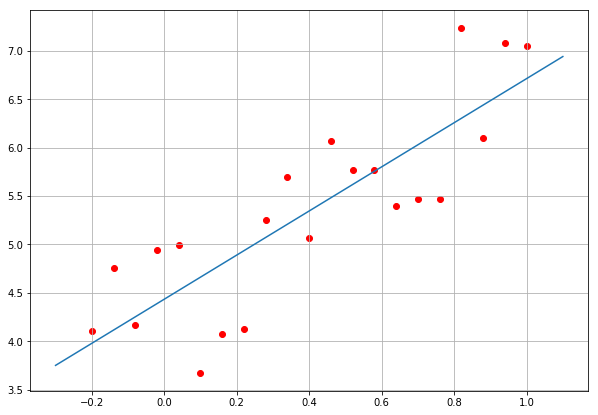

In [922]:
plt.figure(figsize=(10, 7))

def make_y(num):
    return ans[0] * num + ans[1]

plt.scatter(X_train, y_train, color='red')
# plt.scatter(X_test, y_test, color='green')

x_1 = np.linspace(-0.3, 1.1, 2)  # две точки т.к. линейная функция
y_1 = [make_y(i) for i in x_1]
plt.plot(x_1, y_1)
plt.grid(True)
plt.show()

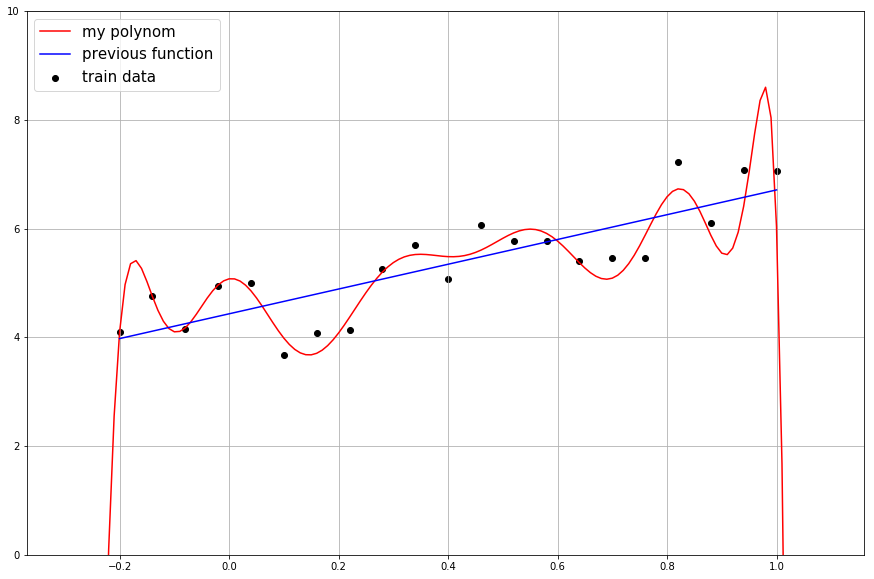

In [923]:
# попытки подобрать руками нужный многочлен с помощью формулы из начала файла

k = 13
X = np.array(X_train ** k, ndmin=2).T
for i in range(k - 1, -1, -1):
    tmp = np.array(X_train ** i, ndmin=2).T
    X = np.concatenate((X, tmp), axis=1)

coeffs = (np.linalg.inv(np.dot(X.T, X))).dot(X.T).dot(y_train)

x_dots = np.arange(-0.3, 1.1, 0.01)

my_pol = []
for x in x_dots:
    tmp = 0
    for i in range(k + 1):
        tmp += coeffs[i] * (x ** (k - i)) 
    my_pol.append(tmp)

plt.figure(figsize=(15, 10))
plt.ylim(0, 10)
plt.scatter(X_train, y_train, color='black', label='train data')

plt.plot(x_dots, my_pol, color='red', label='my polynom')

x_1 = np.linspace(-0.2, 1, 2)
y_1 = [make_y(i) for i in x_1]
plt.plot(x_1, y_1, color='blue', label='previous function')

plt.legend(prop={'size': 15})
plt.grid(True)
plt.show()

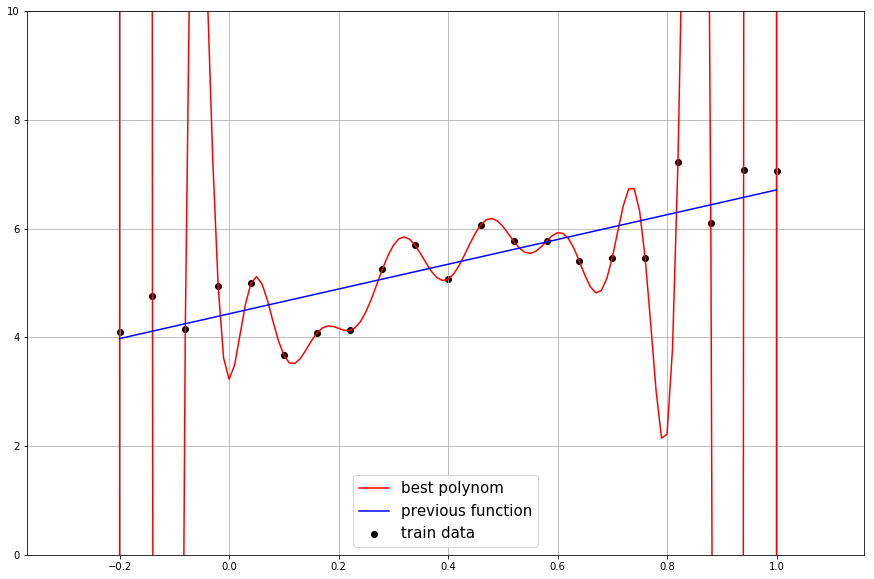

In [924]:
# идеальное приближение многочленом степени n-1

k = n - 1
X = np.array(X_train ** k, ndmin=2).T
for i in range(k - 1, -1, -1):
    tmp = np.array(X_train ** i, ndmin=2).T
    X = np.concatenate((X, tmp), axis=1)

coeffs = np.linalg.solve(X, np.array(y_train, ndmin=2).T)
# используем это поэтому что формула из начала файла дает некотороую погрешность

x_dots = np.arange(-0.3, 1.1, 0.01)

best_pol = []
for x in x_dots:
    tmp = 0
    for i in range(k + 1):
        tmp += coeffs[i] * (x ** (k - i)) 
    best_pol.append(tmp)

plt.figure(figsize=(15, 10))
plt.ylim(0, 10)
plt.scatter(X_train, y_train, color='black', label='train data')

plt.plot(x_dots, best_pol, color='red', label='best polynom')

x_1 = np.linspace(-0.2, 1, 2)
y_1 = [make_y(i) for i in x_1]
plt.plot(x_1, y_1, color='blue', label='previous function')

plt.legend(prop={'size': 15})
plt.grid(True)
plt.show()

Для $k = 1,2,3,\ldots,10$ найдите многочлен $\hat{f}_k$ степени $k$, наилучшим образом приближающий неизвестную зависимость. Для каждого из них найдите среднеквадратическую ошибку на обучающих данных и на тестовых данных: $\frac1{n}\sum_{i=1}^n\left( \hat{f}_k(x_i) - y_i \right)^2$ (в первом случае сумма ведётся по парам $(x_i, y_i)$ из обучающих данных, а во втором - по парам из тестовых данных).

Для $k = 1,2,3,4,6$ напечатайте коэффициенты полученных многочленов и нарисуйте их графики на одном чертеже вместе с точками $(x_i, y_i)$ (возможно, график стоит сделать побольше; это делается командой `plt.figure(figsize=(width, height))`).

In [830]:
for k in range(1, 11):
    X = np.array(X_train ** k, ndmin=2).T
    
    for i in range(k - 1, -1, -1):
        tmp = np.array(X_train ** i, ndmin=2).T
        X = np.concatenate((X, tmp), axis=1)
        
    coeffs = (np.linalg.inv(np.dot(X.T, X))).dot(X.T).dot(y_train)
    
    train_error = 0
    for i in range(n):
        x = X_train[i]
        y = y_train[i]
        tmp = 0
        for j in range(k + 1):
            tmp += coeffs[j] * (x ** (k - j))
        train_error += (tmp - y) ** 2
    train_error /= n
    
    test_error = 0
    for i in range(n):
        x = X_test[i]
        y = y_test[i]
        tmp = 0
        for j in range(k + 1):
            tmp += coeffs[j] * (x ** (k - j))
        test_error += (tmp - y) ** 2
    test_error /= n

    print('Степень {}: \n ошибка на обучающей выборке: {} \n ошибка на тестовой выборке: {}'.format(k, train_error, test_error))

Степень 1: 
 ошибка на обучающей выборке: 0.296896633263 
 ошибка на тестовой выборке: 0.435120200405
Степень 2: 
 ошибка на обучающей выборке: 0.269698915877 
 ошибка на тестовой выборке: 0.356476288783
Степень 3: 
 ошибка на обучающей выборке: 0.269497187148 
 ошибка на тестовой выборке: 0.355346457152
Степень 4: 
 ошибка на обучающей выборке: 0.261066533058 
 ошибка на тестовой выборке: 0.441727018929
Степень 5: 
 ошибка на обучающей выборке: 0.249985046483 
 ошибка на тестовой выборке: 0.557973202133
Степень 6: 
 ошибка на обучающей выборке: 0.188293489884 
 ошибка на тестовой выборке: 2.5816929323
Степень 7: 
 ошибка на обучающей выборке: 0.185396211533 
 ошибка на тестовой выборке: 2.51578288183
Степень 8: 
 ошибка на обучающей выборке: 0.159055565791 
 ошибка на тестовой выборке: 4.35728846102
Степень 9: 
 ошибка на обучающей выборке: 0.158471842747 
 ошибка на тестовой выборке: 4.77634778777
Степень 10: 
 ошибка на обучающей выборке: 0.153166110651 
 ошибка на тестовой выборке:

Коэффициенты, начиная со старшей степени:
1: [2.2791345  4.43323091]
2: [1.40162851 1.15783169 4.4724765 ]
3: [-0.3817686   1.85975084  1.06501611  4.46073636]
4: [  7.9184747  -13.05132812   6.79409178   1.17180239   4.34116612]
6: [-229.97013342  581.45329825 -481.51013289  121.25709713   16.00290399
   -4.59717933    4.38379501]


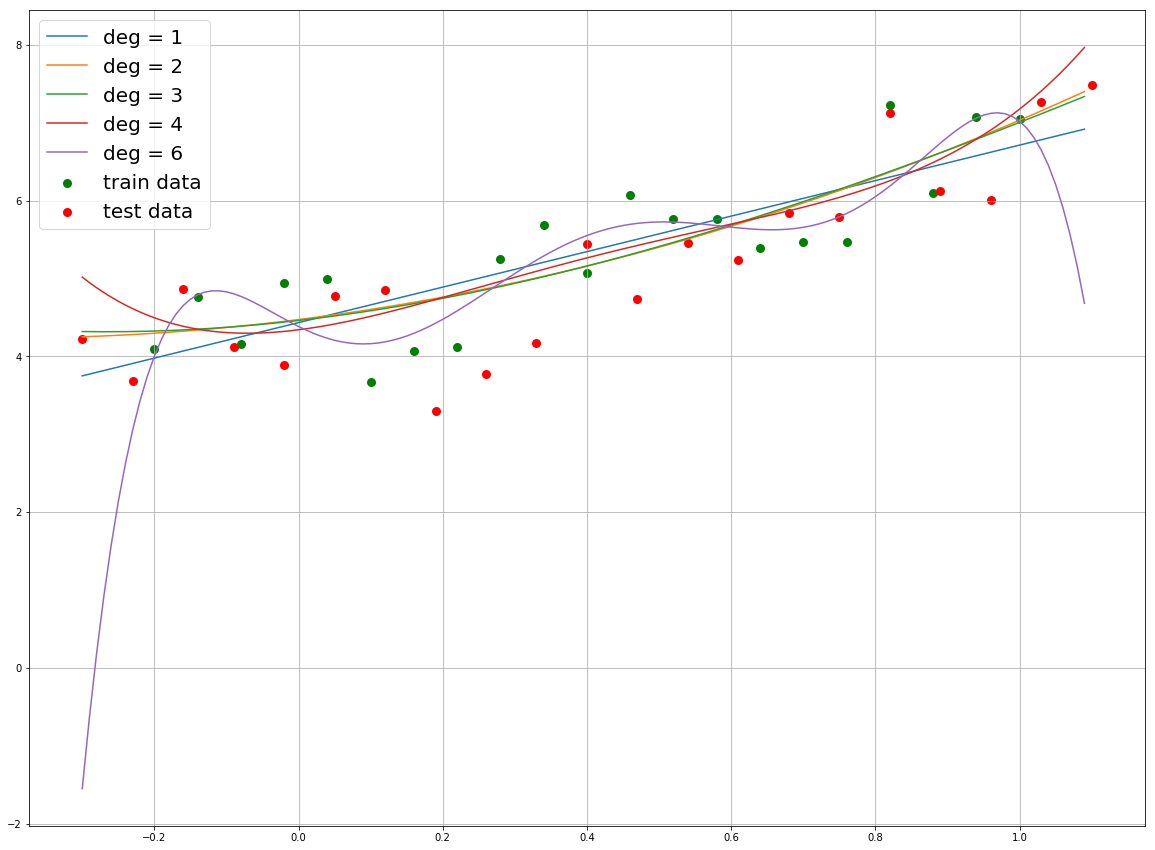

In [848]:
plt.figure(figsize=(20, 15))
plt.scatter(X_train, y_train, color='green', linewidth = 3, label='train data')
plt.scatter(X_test, y_test, color='red', linewidth = 3, label='test data')

x_dots = np.arange(-0.3, 1.1, 0.01)

print('Коэффициенты, начиная со старшей степени:')
for k in (1,2,3,4,6):
    X = np.array(X_train ** k, ndmin=2).T

    for i in range(k - 1, -1, -1):
        tmp = np.array(X_train ** i, ndmin=2).T
        X = np.concatenate((X, tmp), axis=1)
    
    solved = (np.linalg.inv(np.dot(X.T, X))).dot(X.T).dot(y_train)
    print('{}: {}'.format(k, solved))
    
    y = []
    for i in x_dots:
        tmp = 0
        for j in range(k + 1):
            tmp += solved[j] * (i ** (k - j))
        y.append(tmp)
    
    plt.plot(x_dots, y, label='deg = '+str(k))

plt.legend(prop={'size': 20})
plt.grid(True)
plt.show()

Что происходит с ошибкой при росте степени многочлена? Казалось бы, чем больше степень, тем более сложным будет многочлен и тем лучше он будет приближать нашу функцию. Подтверждают ли это ваши наблюдения? Как вам кажется, чем объясняется поведение ошибки на тестовых данных при $k = 10$?

- Ошибка для обучающей выборки с ростом степени будет уменьшаться, но для тестовой наоборот. Это видно на последнем графике. Как только функция вышла за границы обучающей выборки, сразу графики начали уходить в бесконечность (вверх или вниз). И это уже при 6 степени.

- Даже при обучающей выборке в полиноме все равно есть некоторая ошибка, которая в тестовой выборке при росте степени даст рост погрешности, т.к. эта погрешность на обучающих данных уменьшалась путем "подгона" к конкретным значениям, а тестовая выборка отличается от обучающей.

### Задание 2. Линейная регрессия (4 балла)

Скачайте файлы ``flats_moscow_mod.txt`` и ``flats_moscow_description.txt``. В первом из них содержатся данные о квартирах в Москве. Каждая строка содержит шесть характеристик некоторой квартиры, разделённые знаками табуляции; в первой строке записаны кодовые названия характеристик. Во втором файле приведены краткие описания признаков. Вашей задачей будет построить с помощью метода наименьших квадратов (линейную) зависимость между ценой квартиры и остальными доступными параметрами.

С помощью известных вам формул найдите регрессионные коэффициенты. Какой смысл имеют их знаки? Согласуются ли они с вашими представлениями о жизни?

Оцените качество приближения, вычислив среднеквадратическую ошибку.

In [871]:
data_flats = np.loadtxt('/home/mr_arvo/Документы/linal/flats_moscow_mod.txt', delimiter='\t', skiprows=1)

price = data_flats[:,0]
totsp = data_flats[:,1]
livesp = data_flats[:,2]
kitsp = data_flats[:,3]
dist = data_flats[:,4]
metrdist = data_flats[:,5]

n = data_flats.shape[0]

X = data_flats[:,1:]
X = np.concatenate((X, np.array(np.ones(n), ndmin=2).T), axis=1)

coeffs = (np.linalg.inv(np.dot(X.T, X))).dot(X.T).dot(price)

print('Линейные коэффициенты: \n Общая площадь: {}\n Жилая площадь: {}\n Площадь кухни: {}\n Расстояние до центра: {}\n Расстояние до метро {}\n'.format(coeffs[0], coeffs[1], coeffs[2], coeffs[3], coeffs[4]))

Линейные коэффициенты: 
 Общая площадь: 1.48705288613
 Жилая площадь: 1.65628900123
 Площадь кухни: 1.81920497927
 Расстояние до центра: -3.32715405627
 Расстояние до метро -1.3156886037



Какой смысл имеют их знаки?
- Коэффициенты, входящие со знаком + повышают стоимость квартиры. Очевидно, что чем больше площадь вартиры, тем она дороже. Те коэффициенты, что входят со знаком -, уменьшают стоимость. Действительно, чем квартира дальше от метро и от центра - тем она дешевле, а чем площадь квартиры больше - тем она дороже.

Согласуются ли они с вашими представлениями о жизни?
- В целом да. Квартиры в центре дорогие, на окраине наоборот дешевле. Но сомневаюсь, что размер кухни важнее, чем жилая площадь.

In [873]:
error = 0
for i in range(n):
    tmp = 0
    for j in range(6):
        tmp += coeffs[j] * X[i][j]
    error += (tmp - price[i]) ** 2
error /= n

print('Ошибка: {}'.format(error))

Ошибка: 924.009003208


### Усложнение модели

Конечно, никто не гарантирует, что объясняемая переменная (цена квартиры) зависит от остальных характеристик именно линейно. Зависимость может быть, например, квадратичной или логарифмической; больше того, могут быть важны не только отдельные признаки, но и их комбинации. Это можно учитывать, добавляя в качестве дополнительных признаков разные функции от уже имеющихся характеристик: их квадраты, логарифмы, попарные произведения.

В этом задании вам нужно постараться улучшить качество модели, добавляя дополнительные признаки, являющиеся функциями от уже имеющихся. Но будьте осторожны: чрезмерное усложнение модели будет приводить к переобучению. 

**Сравнение моделей**

Когда вы построите новую модель, вам захочется понять, лучше она или хуже, чем изначальная. Проверять это на той же выборке, на которой вы обучались, бессмысленно и даже вредно (вспомните пример с многочленами: как прекрасно падала ошибка на обучающей выборке с ростом степени!). Поэтому вам нужно будет разделить выборку на обучающую и тестовую. Делать это лучше случайным образом (ведь вы не знаете, как создатели датасета упорядочили объекты); рекомендуем вам для этого функцию `sklearn.model_selection.train_test_split`.

In [896]:
from sklearn.model_selection import train_test_split

num_train, num_test, price_train, price_test = train_test_split(range(n), price)

new_Y = np.array(price, ndmin=2).T

new_X = data_flats[:,1:]
new_X = np.concatenate((new_X, new_X ** 2, np.log(new_X), new_X ** 0.5, new_X ** 3, new_X ** 4), axis=1)

new_coeffs = sla.inv((new_X.T).dot(new_X)).dot(new_X.T).dot(new_Y)
new_coeffs = new_coeffs.T[0]

sum_of_err = 0
for i in range (10000):
    old_error = 0
    for i in num_test:
        tmp = 0
        for j in range(X.shape[1]):
            tmp += coeffs[j] * X[i][j]
        old_error += (tmp - price[i]) ** 2
    old_error /= len(num_test)

    new_error = 0
    for i in num_test:
        tmp = 0
        for j in range(new_X.shape[1]):
            tmp += new_coeffs[j] * new_X[i][j]
        new_error += (tmp - price[i]) ** 2
    new_error /= len(num_test)
    
    sum_of_err += old_error - new_error

print('В среднем, ошибка на тестовой выборке стала меньше на: {}'.format(sum_of_err/10000))

В среднем, ошибка на тестовой выборке стала меньше на: 154.5844154


### Задание 3. Регуляризация (2 балла)

Вспомним, что задача линейной регрессии формулируется как задача нахождения проекции вектора значений объясняемой переменной $y$ на линейную оболочку $\langle x_1,\ldots,x_k\rangle$ векторов значений регрессоров. Если векторы $x_1,\ldots,x_k$ линейно зависимы, то матрица $X^TX$ вырожденна и задача не будет решаться (то есть будет, но не с помощью приведённой выше формулы). В жизни, по счастью, различные признаки редко бывают *в точности* линейно зависимы, однако во многих ситуациях они скоррелированы и становятся "почти" линейно зависимыми. Таковы, к примеру, зарплата человека, его уровень образования, цена машины и суммарная площадь недвижимости, которой он владеет. В этом случае матрица $X^TX$ будет близка к вырожденной, и это приводит к численной неустойчивости и плохому качеству решений; как следствие, будет иметь место переобучение. Один из симптомов этой проблемы - необычно большие по модулю компоненты вектора $a$.

Есть много способов борьбы с этим злом. Один из них - регуляризация. Сейчас мы рассмотрим одну из её разновидностей --- **L2-регуляризацию**. Идея в том, чтобы подправить матрицу $X^TX$, сделав её "получше". Например, это можно сделать, заменив её на $(X^TX + \lambda E)$, где $\lambda$ --- некоторый скаляр. Пожертвовав точностью на обучающей выборке, мы тем не менее получаем численно более стабильное псевдорешение $a = (X^TX + \lambda E)^{-1}X^Ty$ и снижаем эффект переобучения. Параметр $\lambda$ нужно подбирать, и каких-то универсальных способов это делать нет, но зачастую можно его подобрать таким, чтобы ошибка на тестовой выборке падала. 

Теперь давайте вспомним первую задачу. Если вы её сделали, то помните, что ошибка аппроксимации многочленом шестой степени довольно высокая. Убедитесь, что, используя регуляризацию с хорошо подобранным коэффициентом $\lambda$, ошибку на тестовой выборке можно сделать не больше, чем для многочлена оптимальной степени в модели без регрессии. Для этого $\lambda$ сравните $\det(X^TX)$ и $\det(X^TX + \lambda E)$.

In [858]:
n = 21
k = 6
lamb = 1.21

X = np.array(X_train ** k, ndmin=2).T
for i in range(k - 1, -1, -1):
    tmp = np.array(X_train ** i, ndmin=2).T
    X = np.concatenate((X, tmp), axis=1)

x_dots = np.arange(-0.3, 1.1, 0.01)
    
old_coeffs = (np.linalg.inv(np.dot(X.T, X))).dot(X.T).dot(y_train)
new_coeffs = (np.linalg.inv(np.dot(X.T, X) + lamb * np.eye(k + 1))).dot(X.T).dot(y_train)

old_error = 0
for i in range(n):
    x = X_test[i]
    y = y_test[i]
    tmp = 0
    for j in range(k + 1):
        tmp += old_coeffs[j] * (x ** (k - j))
    old_error += (tmp - y) ** 2
old_error /= n

new_error = 0
for i in range(n):
    x = X_test[i]
    y = y_test[i]
    tmp = 0
    for j in range(k + 1):
        tmp += new_coeffs[j] * (x ** (k - j))
    new_error += (tmp - y) ** 2
new_error /= n

print('Старая ошибка: {}\nНовая ошибка: {} \n'.format(old_error, new_error))
print('Старый определитель: {}'.format(sla.det((X.T).dot(X))))
print('Новый определитель: {}'.format(sla.det((X.T).dot(X) + lamb * np.eye(k + 1))))

Старая ошибка: 2.5816929323
Новая ошибка: 0.307437473351 

Старый определитель: 9.08286483825e-12
Новый определитель: 1246.27746285


- В модели без регресии мы минимально получали ошибку в 0.355, а здесь нам удалось добиться ошибки в 0.307

- По определителю без регрессии видно, что матрица почти вырождена, а с регрессией уже нет

Нарисуйте на одном чертеже графики многочленов шестой степени, приближающих неизвестную функцию, для модели с регуляризацией и без. Чем первый из них выгодно отличается от второго?

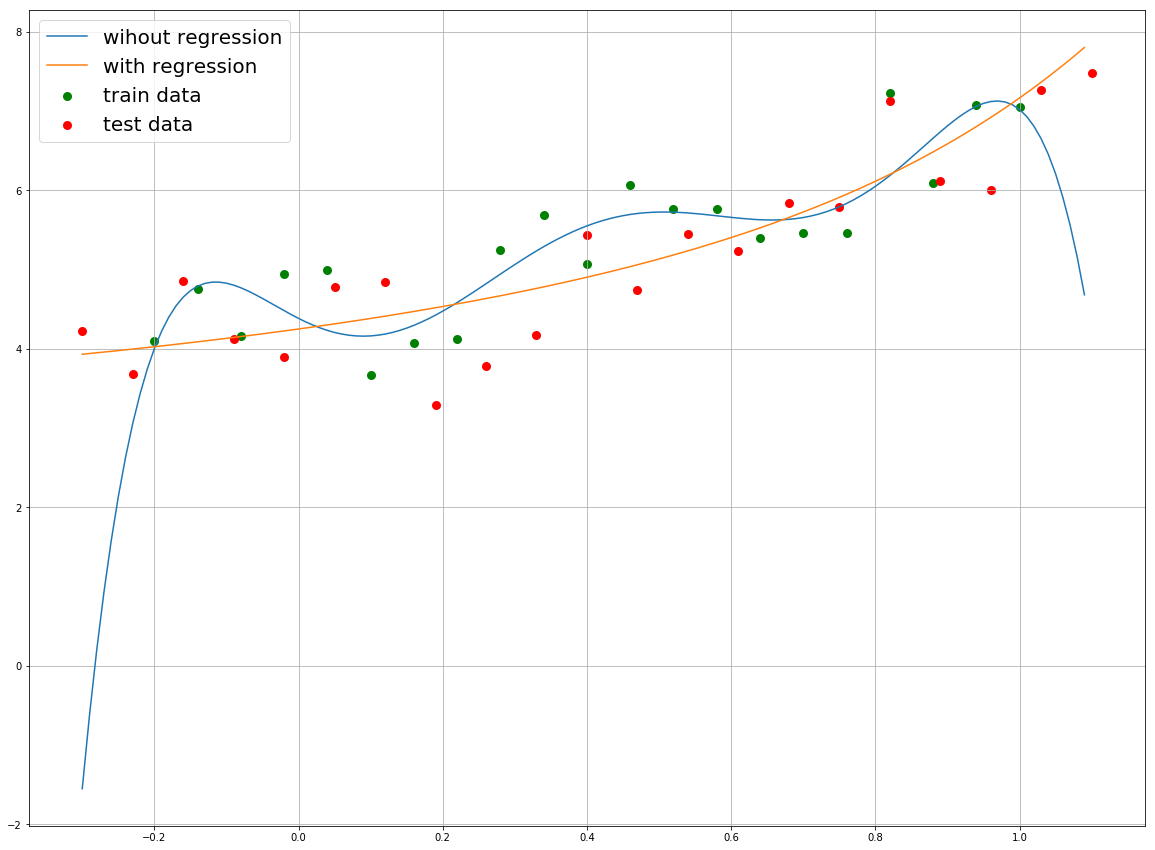

In [836]:
old_pol = []
for x in x_dots:
    tmp = 0
    for i in range(k + 1):
        tmp += old_coeffs[i] * (x ** (k - i))
    old_pol.append(tmp)

new_pol = []
for x in x_dots:
    tmp = 0
    for i in range(k + 1):
        tmp += new_coeffs[i] * (x ** (k - i))
    new_pol.append(tmp)

plt.figure(figsize=(20, 15))
plt.scatter(X_train, y_train, color='green', linewidth = 3, label='train data')
plt.scatter(X_test, y_test, color='red', linewidth = 3, label='test data')
plt.plot(x_dots, old_pol, label='wihout regression')
plt.plot(x_dots, new_pol, label='with regression')
plt.legend(prop={'size': 20})
plt.grid(True)
plt.show()

- Полином с регуляризацией не уходит в бесконечность, как только выходит за границы обучающих данных. Также он имеет более простой вид.

- Еще стоит отметить, что ошибка стала меньше на тестовых данных, что несомненно хорошо.

Попробуйте доказать, что вектор $a = (X^TX + \lambda E)^{-1}X^Ty$ является решением задачи

$$|Xa - y|^2 + \lambda|a|^2\rightarrow\min$$

Интуитивно это можно понимать так: мы ищем компромисс между минимизацией длины разности $|Xa - y|$ (то есть точностью решения задачи регрессии) и тем, чтобы компоненты вектора $a$ не становились слишком большими по модулю.

---

**Ваше решение напишите прямо здесь**

Попытка не удалась :)

### Задание 4. Онлайн-обучение линейной регрессии (3 балла)

Раньше мы работали в ситуации, когда объекты $x_i$ и значения $y_i$ даны с самого начала и всегда доступны. Допустим теперь, что пары $(x_i, y_i)$ поступают к нам по одной, и мы не можем себе позволить хранить их все в памяти (это может быть актуально, например, если вы пытаетесь обучить модель на устройстве со сравнительно небольшим количеством оперативной памяти: скажем, на мобильном телефоне или на бортовом компьютере спутника связи). В этом случае нам нужно уметь решать следующую задачу:

**Известно:** решение задачи регрессии для датасета $(x_1, y_1),\ldots,(x_t,y_t)$;

**На вход поступает:** новая пара $(x_{t+1}, y_{t+1})$;

**Требуется:** быстро (за время, не зависящее от $t$) отыскать решение задачи регрессии для расширенного датасета $(x_1, y_1),\ldots,(x_t,y_t),(x_{t+1}, y_{t+1})$.

Эту задачу мы будем решать в два этапа.

**Этап 1.** Обозначим $X_{(t)} = (x_1\ldots x_t)$ и $y_{(t)} = (y_1,\ldots,y_t)^T$. Тогда, как мы хорошо помним, решение задачи регрессии для датасета $(x_1, y_1),\ldots,(x_t,y_t)$ имеет вид $\hat{a}_{(t)} = \left(X^T_{(t)}X_{(t)}\right)^{-1}X^T_{(t)}y_{(t)}$. Размеры матриц $X^T_{(t)}X_{(t)}$ и $X^T_{(t)}y_{(t)}$ не зависят от $t$, поэтому их мы, пожалуй, можем себе позволить хранить в памяти.

И вот ваше первое задание в этом разделе: придумайте алгоритм, принимающий на вход матрицы $X^T_{(t)}X_{(t)}$ и $X^T_{(t)}y_{(t)}$, а также пару $(x_{t+1}, y_{t+1})$ и вычисляющий матрицы $X^T_{(t+1)}X_{(t+1)}$ и $X^T_{(t+1)}y_{(t+1)}$. Сложность вашего алгоритма не должна зависеть от $t$!

--

**Описание вашего алгоритма напишите прямо здесь**

**1) Разберем матрицу** $X_t^T X_t$ <br>
$X_t^T X_t = A$ <br>
$A_{ij} = \sum_{k=1}^{t} x_{ki} * x_{kj}$ <br>

$X_{(t+1)}^T X_{(t+1)} = B$ <br>
$B_{ij} = \sum_{k=1}^{t+1} x_{ki} * x_{kj}$ <br>

Получается, что матрицу B из матрицы A можно получить таким образом. <br>
$B_{ij} <=> A_{ij} += x_{(t+1)i} * x_{(t+1)j}$ <br>

Эти действия не зависят от t, т.к. размер матрицы $X_t^T X_t$ не зависит от t, а мы просто берем и прибавляем к ее элементам произведение (количество элементов от t не меняется, значит не меняется количество сумм. произведение всегда двух элементов). На каждом шаге мы будем совершать одни и те же по сложности действия, а эта сложность не зависит от t. Значит и вся сложность превращения $X_t^T X_t$ в $X_{(t+1)}^T X_{(t+1)}$ не зависит от t

**2) Разберем матрицу** $X_t^T y_t$ <br>
$X_t^T y_t = A$ <br>
$A_{i} = \sum_{k=1}^{t} x_{ki} * y_k$ <br>

$X_{(t+1)}^T y_{(t+1)} = B$ <br>
$B_{i} = \sum_{k=1}^{t+1} x_{ki} * y_{k}$ <br>

Получается, что матрицу B из матрицы A можно получить таким образом. <br>
$B_{i} <=> A_{i} += x_{(t+1)i} * y_{(t+1)}$ <br>

Эти действия не зависят от t, т.к. размер матрицы $X_t^T y_t$ не зависит от t, а мы просто берем и прибавляем к ее элементам произведение (количество элементов от t не меняется, значит не меняется количество сумм. произведение всегда двух элементов). На каждом шаге мы будем совершать одни и те же по сложности действия, а эта сложность не зависит от t. Значит и вся сложность превращения $X_t^T y_t$ в $X_{(t+1)}^T y_{(t+1)}$ не зависит от t


**Этап 2.** Теперь настало время написать немного кода и порисовать красивые картинки. Вам нужно будет реализовать симуляцию онлайн-обучения регрессии для задачи приближения функции (в данном случае $f_{true}(x) = 2x\sin(x) + x^2 - 1$; все значения искажены небольшим нормальным шумом) многочленом степени не выше 5.

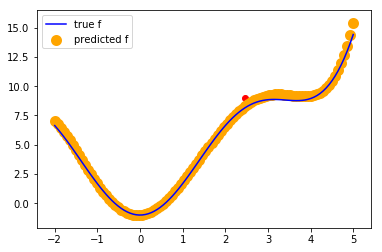

In [929]:
from IPython.display import clear_output

f_true = lambda x: 2*x*np.sin(x) + x**2 - 1 # функция как в задании. исправил ошибку. заменил sin(5*x) на sin(x)

#f_true = lambda x: 2*x*np.sin(5*x) + x**2 - 1 # this is the true function
                                               # ошибка. в синусе зачем-то домножили x на 5

# We need this to make the plot of f_true:
x_grid = np.linspace(-2,5,100) # 100 linearly spaced numbers
x_grid_enl = np.hstack((x_grid.reshape((100,1))**j for j in range(6)))
y_grid = f_true(x_grid)

XTX = np.dot(x_grid_enl.T, x_grid_enl)
XTy = np.dot(x_grid_enl.T, y_grid)

for i in range(200):

    x_new = np.random.uniform(-2, 5)
    y_new = f_true(x_new) + 2*np.random.randn()
    
    tmp_pol = [x_new**j for j in range(6)]
    for j in range(len(XTX)):
        for k in range(len(XTX)):
            XTX[j][k] += tmp_pol[j] * tmp_pol[k]
    
    for j in range(len(XTy)):
        XTy[j] += tmp_pol[j] * y_new
    
    coeffs = np.dot(np.linalg.inv(XTX), XTy)
    # the rest of code is just bells and whistles
    if (i+1)%5==0:
        clear_output(True)
        plt.plot(x_grid, y_grid, color='blue', label='true f')
        plt.scatter(x_new, y_new, color='red')
        
        # your code goes here
        y_pred = []
        for x in x_grid:
            tmp = 0
            for k in range(6):
                tmp += coeffs[k] * (x ** k)
            y_pred.append(tmp)
        
        plt.scatter(x_grid, y_pred, color='orange', linewidth=5, label='predicted f')
        
        plt.legend(loc='upper left')
        plt.show()

### Добавление. QR-разложение

**QR-разложением** матрицы $A$ (не обязательно квадратной) мы будем называть её представление в виде $A = QR$, где $Q$ - матрица с ортонормированными столбцами, а $R$ - верхнетреугольная матрица.

Смысл QR-разложения следующий. Пусть $a_1,\ldots,a_m$ - столбцы матрицы $A$, $q_1,\ldots,q_t$ - столбцы матрицы $Q$. Тогда $q_1,\ldots,q_t$ - это ортонормированный базис в подпространстве, являющемся линейной оболочкой векторов $a_1,\ldots,a_m$, а в матрице $R$ записаны коэффициенты, с помощью которых $a_i$ выражаются через $q_1,\ldots,q_t$.

Находить QR-разложение заданной матрицы можно разными способами. Мы познакомим вас не с самым лучшим из них, но по крайней мере с наиболее простым концептуально. Заметим, что ортогональный базис линейной оболочки можно найти с помощью ортогонализации Грама-Шмидта. При этом коэффициенты из матрицы $R$ получаются в качестве побочного продукта этого процесса:

```python
for j = 1...n:
    q_j = a_j
    for i = 1,...,j-1:
        r_ij = (q_i, a_j)
        q_j = q_j - r_ij * q_i
    r_jj = |q_j|
    if r_jj == 0: # a_j in <a_1,...,a_j-1>
        # What would you do in this case?..
    q_j = q_j / r_jj
```

Для нахождения QR-разложения вы можете использовать библиотечную функцию `scipy.linalg.qr`.

Поскольку лабораторная про линейную регрессию, не так-то просто замять вопрос о том, какое же отношение QR-разложение имеет к задаче регрессии. Упомянем одно из возможных применений.

Допустим, мы нашли QR-разложение матрицы $X$, а именно: $X = QR$. Тогда
$$X^TX = (QR)^T(QR) = R^TQ^TQR = R^TR$$

Поскольку в задаче регрессии матрица $X$ обычного полного ранга (то есть её столбцы линейно независимы), матрица $R$ будет квадратной. Благодаря этому нашу обычную формулу для набора регрессионных коэффициентов $\hat{a}$ можно переписать в следующем виде:

$$\hat{a} = (X^TX)^{-1}X^Ty = (R^TR)^{-1}(QR)^Ty = R^{-1}(R^T)^{-1}R^TQ^Ty = R^{-1}Q^Ty$$

Как видите, формула стала проще. Более того, зачастую обращение матрицы $R$ может быть численно более устойчиво, чем обращение матрицы $X^TX$.